## Introduction to Pytorch

### PyTorch Tensors

In [1]:
import torch

In [2]:
z = torch.zeros(5,3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [3]:
i = torch.ones((5,3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


학습 가중치를 무작위로 초기화하는 것이 일반적이며, 종종 결과의 재현성을 위해 난수생성으로 특정 시드로 초기화합니다.

In [6]:
torch.manual_seed(1729)
r1 = torch.rand(2,2)
print('랜덤 tensor 값:')
print(r1)

r2 = torch.rand(2,2)
print('\n다른 랜덤 tensor 값:')
print(r2) # 새로운 2x2 행렬 값

r3 = torch.rand(2,2)
print('\nr1과 일치')
print(r3) # 동일한 시드값으로 인해 r1 값이 반복되어 행렬값으로 나옵니다.

랜덤 tensor 값:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

다른 랜덤 tensor 값:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

r1과 일치
tensor([[0.2162, 0.9927],
        [0.4128, 0.5938]])


In [8]:
ones = torch.ones(2,3)
print(ones)

twos = torch.ones(2,3) * 2 # 모든 원소에 2를 곱합니다.
print(twos)

threes = ones + twos # shape이 비슷하기 때문에 더할 수 있습니다.
print(threes) # tensor의 원소별 더한 값이 결과로 나옵니다.
print(threes.shape) # 입력 tensor와 동일한 차원을 가지고 있습니다.

r1 = torch.rand(2,3)
r2 = torch.rand(3,2)
# 런타임 오류를 발생시키려면 아래 줄의 주석을 해제합니다.
# r3 = r1 + r2

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


torch 수학 연산 예제

In [9]:
r = (torch.rand(2,2) - 0.5) * 2 # -1과 1 사이의 값을 가집니다.
print('랜덤 행렬값, r:')
print(r)

랜덤 행렬값, r:
tensor([[ 0.0124,  0.6939],
        [-0.4823, -0.4587]])


In [12]:
# 일반적인 수학적 연산은 다음과 같이 지원됩니다.
print('r의 절대값:')
print(torch.abs(r))

r의 절대값:
tensor([[0.0124, 0.6939],
        [0.4823, 0.4587]])


In [13]:
# 삼각함수를 사용할 수 있습니다.
print('r의 역 사인 함수:')
print(torch.asin(r))

r의 역 사인 함수:
tensor([[ 0.0124,  0.7669],
        [-0.5033, -0.4765]])


In [16]:
# 행렬식 및 특이값 분해와 같은 선형 대수 연산을 사용할 수 있습니다.
print('r의 행렬식:')
print(torch.det(r))
print('\nr의 특이값 분해:')
print(torch.svd(r))

r의 행렬식:
tensor(0.3290)

r의 특이값 분해:
torch.return_types.svd(
U=tensor([[ 0.7278, -0.6858],
        [-0.6858, -0.7278]]),
S=tensor([0.8872, 0.3708]),
V=tensor([[ 0.3830,  0.9237],
        [ 0.9237, -0.3830]]))


In [18]:
# 통계 및 집합 연산 등을 사용할 수 있습니다:
print('r의 평균 및 표준편차:')
print(torch.std_mean(r))
print('\nr의 최대값:')
print(torch.max(r))

r의 평균 및 표준편차:
(tensor(0.5510), tensor(-0.0587))

r의 최대값:
tensor(0.6939)


### PyTorch Models

In [20]:
import torch                     # PyTorch 모든 모듈 가져오기
import torch.nn as nn            # torch.nn.Module의 경우 PyTorch model의 부모 객체
import torch.nn.functional as F  # 활성화 함수 모듈 가져오기

In [21]:
class LeNet(nn.Module):

    def __init__(self):
        super(LeNet, self).__init__()
        # 입력 이미지 채널, 6개의 output 채널, 3x3 정방 합성곱 커널을 사용합니다.
        self.conv1 = nn.Conv2d(1, 6, 3) # 합성곱 계층 >> 연산 과정 아래 확인!
        self.conv2 = nn.Conv2d(6, 16, 3)
        # 아핀 변환: y = Wx + b >> 아핀변환 = 선형변환을 한 후 시프팅(Translation)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 이미지 차원
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) # 10개 중 하나로 분류 >> 다중분류

    def forward(self, x): # 실제 계산 수행
        # 최대 풀링은 (2, 2) 윈도우 크기를 사용합니다.
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 정방 사이즈인 경우, 단일 숫자만 지정할 수 있습니다.
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
        num_features = 1
        for s in size:
            num_features *= s # 16 * 6 * 6
        return num_features

연산과정

In [83]:
conv1 = nn.Conv2d(1, 6, 3)

In [84]:
relu = F.relu(conv1(input))

In [85]:
relu.shape

torch.Size([1, 6, 30, 30])

In [86]:
layer1 = F.max_pool2d(F.relu(conv1(input)), (2, 2))

In [87]:
layer1.shape

torch.Size([1, 6, 15, 15])

In [102]:
conv2 = nn.Conv2d(6, 16, 3)

In [142]:
layer2 = F.max_pool2d(F.relu(conv2(layer1)), 2)

In [143]:
layer2.shape

torch.Size([1, 16, 6, 6])

In [139]:
def num_flat_features(x):
    size = x.size()[1:]  # 크기는 배치 차원을 제외한 모든 차원을 가져옵니다.
    num_features = 1
    for s in size:
        num_features *= s
        print(s)
        print(num_features)
    return num_features

In [144]:
num_flat_features(layer2)

16
16
6
96
6
576


576

In [123]:
layer2 = layer2.view(-1, num_flat_features(layer2))

In [125]:
layer2.shape

torch.Size([1, 576])

In [127]:
fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 이미지 차원
fc2 = nn.Linear(120, 84)
fc3 = nn.Linear(84, 10)

In [131]:
fc11 = F.relu(fc1(layer2))
fc11.shape

torch.Size([1, 120])

In [132]:
fc22 = F.relu(fc2(fc11))
fc22.shape

torch.Size([1, 84])

In [135]:
fc33 = fc3(fc22)
fc33.shape

torch.Size([1, 10])

In [136]:
fc33

tensor([[-0.0565, -0.1095,  0.0816, -0.0024,  0.0952,  0.0696, -0.0297, -0.0548,
          0.1250,  0.1387]], grad_fn=<AddmmBackward0>)

In [138]:
# 오브젝트 인스턴스화 및 샘플 입력 실행

net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32) # 1채널, 32*32사이즈
print('\n이미지 배치 shape:')
print(input.shape) # (image 수, channel 수, Height , Width)

output = net(input)
print('\n:결과 값')
print(output)
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

이미지 배치 shape:
torch.Size([1, 1, 32, 32])

:결과 값
tensor([[ 0.0033, -0.0866,  0.0448,  0.0051,  0.1252, -0.0780, -0.0906, -0.0132,
          0.0785,  0.0333]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


### Datasets 및 Dataloaders

TorchVision에서 바로 다운로드할 수 있는 오픈 데이터셋 중 하나를 사용하여 모델을 통해 이미지를 변환하는 방법, DataLoader를 사용하여 모델에 데이터 배치를 제공하는 방법을 학습

In [2]:
# 이미지를 Pytorch tensor로 변환

#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(), # 이미지를 pytorch tensors 타입으로 변형, pixels 값들을 [0~255]에서 [0.0~1.0]으로 자동 변환
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) # normalize, 0~1에서 -1~1로 조정됨

transforms.ToTensor() & transofrms.Normalize()
> 각 채널별 평균(mean)을 뺀 뒤 표준편차(std)로 나누어 정규화를 진행

> transofrms.Normalize((R채널 평균, G채널 평균, B채널 평균), (R채널 표준편차, G채널 표준편차, B채널 표준편차))로 입력하여 적용 가능

> 위의 예시와 같이 transforms.ToTensor() 후 (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)로 정규화를 적용하게 되면, RGB 각 채널의 픽셀 값에서 0.5를 뺀 뒤 0.5로 나누어 정규화를 진행

> 즉, transforms.ToTensor()가 이미지 픽셀 값의 범위를 0 ~ 1 로 조정했으므로, 최소값(=-1)은 (0 - 0.5) / 0.5 = -1, 최대값(=1) 은 (1 - 0.5) / 0.5 = 1 로 조정됨

> 결국, 위의 예시를 적용한 결과는 -1 ~ 1 범위로 변환됨

> transforms 는 cropping, centering, rotation, reflection를 포함하여 더 많은 변환이 가능

In [3]:
#  CIFAR10 데이터셋 : 동물(새, 고양이, 사슴, 개, 개구리, 말) 6종과 차량(비행기, 자동차, 배, 트럭) 4종의 클래스로 이루어진 데이터셋
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

# root : 데이터를 저장하려는 파일 시스템 경로
# train : 데이터셋을 학습에 사용하는지 여부를 확인하여 대부분의 데이터셋은 학습 및 테스트 데이터셋으로 분할됨
# download : 데이터셋을 다운로드할지에 대한 여부를 확인
# transform : 데이터에 적용하려는 변환 객체를 넣어줌

Files already downloaded and verified


In [147]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, 
                                          shuffle=True, num_workers=2)

  car   cat  ship  frog


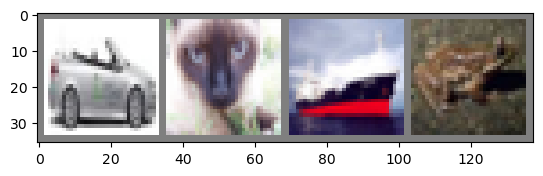

In [148]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지 추출하기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

# labels 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Pytorch 모델 학습

In [149]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [150]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


truck   car  frog  deer


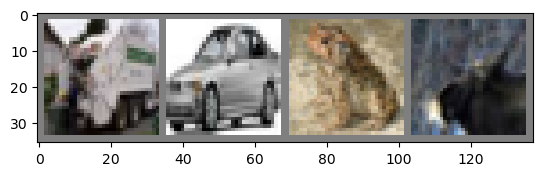

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# 아래 함수는 이미지를 시각화하여 보여주는 함수입니다.
def imshow(img):
    img = img / 2 + 0.5     # 역정규화
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# 무작위로 학습 이미지를 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 시각화하기
imshow(torchvision.utils.make_grid(images))
# 정답 label 출력하기
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [152]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [153]:
criterion = nn.CrossEntropyLoss() # 손실함수 : 데이터 기반으로 모델이 예측한 정답 값이 얼마나 차이가 나는지를 표현하는 지표
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [154]:
for epoch in range(2):  # 데이터셋을 여러 번 반복 학습합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # 데이터를 통해 이미지와 정답값을 받습니다.
        inputs, labels = data

        # 초기 기울기 파라미터를 0으로 설정합니다
        # 기울기는 batch에 걸쳐 누적됨
        # 모든 batch에 대해 기울기 값을 재설정하지 않으면 기울기 값이 계속 누적되어 잘못된 기울기 값 제공하게 되어 학습 불가능함
        optimizer.zero_grad()

        # forward + backward + optimize >> backward() 를 통해 손실 값을 줄일 수 있는 방향으로 학습 가중치들을 조정함
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # epoch 및 loss 값을 출력합니다
        running_loss += loss.item()
        if i % 2000 == 1999:    # 2000 mini-batches 마다 값을 출력합니다
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.228
[1,  4000] loss: 1.887
[1,  6000] loss: 1.687
[1,  8000] loss: 1.591
[1, 10000] loss: 1.515
[1, 12000] loss: 1.488
[2,  2000] loss: 1.396
[2,  4000] loss: 1.374
[2,  6000] loss: 1.360
[2,  8000] loss: 1.337
[2, 10000] loss: 1.318
[2, 12000] loss: 1.281
Finished Training


In [155]:
# Test 수행하여 모델의 일반성을 테스트함 >> 학습되지 않은 데이터에에 대해 예측

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('10000개 테스트 이미지에서 모델 정확도: %d %%' % (
    100 * correct / total))

10000개 테스트 이미지에서 모델 정확도: 55 %
